<a href="https://colab.research.google.com/github/sodi16/Suspicious-Behavior-Recognition/blob/main/Copie_de_HACKANONS_COLAB_25GB_RAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
import shutil
import copy
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import sys
from google.colab.patches import cv2_imshow
from sklearn.metrics import recall_score, classification_report
import pylab as pl
import tensorflow as tf
from tensorflow.python.keras.layers import Input, Dense, ConvLSTM2D
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.python.keras.layers import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.python.keras.models import Sequential, Model
from tensorflow.python.keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping
from PIL import Image

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
cd '/content/drive/My Drive/data_caviar'

/content/drive/My Drive/data_caviar


In [41]:
!git clone https://github.com/sodi16/Suspicious-Behavior-Recognition.git

Cloning into 'Suspicious-Behavior-Recognition'...
remote: Enumerating objects: 50, done.
remote: Counting objects: 100% (50/50), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 50 (delta 20), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (50/50), done.


In [ ]:
os.chdir('/content/drive/My Drive/data_caviar')
model = load_model('model2.h5')
with open('fight_new.npy', 'rb') as f:
  X = np.load(f, allow_pickle=True)
f.close()

In [2]:
os.chdir('/content/drive/My Drive/data_caviar')

all_roles = {'fighters': 2, 'fighter': 2, 'leaving object': 2, 'browser': 1, 'browsers': 1, 'walkers': 0, 'meet': 0, 'meeters': 0, 'walker': 0}
all_context = {'fighting': 2, 'leaving': 2, 'drop down': 2, 'browsing': 1, 'immobile': 0, 'walking': 0, 'meeting': 0, 'windowshop': 0, 'shop enter': 0, 'shop exit': 0, 'shop reenter': 0, 'none':0}

def display_all_suspicious_images(images, labels):
    img = None
    font = cv2.FONT_HERSHEY_SIMPLEX
    for i in range(len(images)):
        image = copy.copy(images[i,:,:,:])
        label = labels[i,:]
        im_shape = image.shape
        if label >= 0.5:
            image = cv2.rectangle(image, (1, 1), (im_shape[1]-1, im_shape[0]-1) , [255, 0, 0], 3)
            image = cv2.putText(img=image,text='Suspicious Behavior', org=(12,12), fontFace=font ,fontScale=0.4, color=[255,0,0], lineType=3)
        else:
            image = cv2.putText(img=image,text='Not Suspicious Behavior', org=(12,12), fontFace=font ,fontScale=0.4, color=[255,0,0], lineType=3)
        if img is None:
            img = pl.imshow(image)
        img.set_data(image)
        pl.draw()
        pl.title('Frame ' + str(i))

        if id == 1000:
            break
            pl.close('all')

        if cv2.waitKey(0) & 0xFF == ord('q'):
            cv2.destroyAllWindows()
            pl.close('all')
            break


def suspicious_behavior_labels(labels):
    very_suspicious_index = 2
    suspicious_index = 1
    not_suspicious_index = 0
    num_frames = len(labels)

    new_labels = np.array([],dtype=int)
    check_role = np.array([])
    check_context = np.array([])

    for i in range(num_frames):
        check_role = np.append(check_role, np.max())
        check_context = np.append(check_context, np.min([switcher.get(item) for item in labels[i, 1]]))

    for i in range(len(labels)):
        if check_role[i] in very_suspicious_index  or check_context[i] in very_suspicious_index:
            new_labels = np.append(new_labels, 2)
        elif check_role[i] in suspicious_index  or check_context[i] in suspicious_index:
            new_labels = np.append(new_labels, 1)
        else:
            new_labels = np.append(new_labels, 0)

    return new_labels.reshape(len(new_labels), 1)


def plot_history(history):
  plt.plot(history.history['acc'])
  plt.plot(history.history['val_acc'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

In [9]:
############################################### NEW DATA IN GRAY CHANNEL
os.chdir('/content/drive/My Drive/data_caviar')
with open(r'label_Walk/X.npy', 'rb') as f:
  X_walk = np.load(f, allow_pickle=True)
f.close()
with open(r'label_Walk/y.npy', 'rb') as f:
  y_walk = np.load(f, allow_pickle=True)
f.close()

with open(r'label_Fight/X.npy', 'rb') as f:
  X_fight = np.load(f, allow_pickle=True)
f.close()
with open(r'label_Fight/y.npy', 'rb') as f:
  y_fight = np.load(f, allow_pickle=True)
f.close()

with open(r'label_LeftBag/X.npy', 'rb') as f:
  X_leftbag = np.load(f, allow_pickle=True)
f.close()
with open(r'label_LeftBag/y.npy', 'rb') as f:
  y_leftbag = np.load(f, allow_pickle=True)
f.close()

with open(r'label_Groups_Meeting/X.npy', 'rb') as f:
  X_groups = np.load(f, allow_pickle=True)
f.close()
with open(r'label_Groups_Meeting/y.npy', 'rb') as f:
  y_groups = np.load(f, allow_pickle=True)
f.close()

with open(r'label_Rest/X.npy', 'rb') as f:
  X_rest = np.load(f, allow_pickle=True)
f.close()
with open(r'label_Rest/y.npy', 'rb') as f:
  y_rest = np.load(f, allow_pickle=True)
f.close()

gen = ImageDataGenerator()
new_fight = []
for i in X_fight[:]:
  new_fight.append(gen.apply_transform(i, transform_parameters={'theta':10, 'brightness':0.85, 'flip_horizontal':True, 'shear_range':0.15,'zoom_range':0.15}))
new_fight = np.array(new_fight)

gen = ImageDataGenerator()
new_leftbag = []
for i in X_leftbag[:]:
  new_leftbag.append(gen.apply_transform(i, transform_parameters={'theta':10,'brightness':0.85,'flip_horizontal':True, 'shear_range':0.15,'zoom_range':0.15}))
new_leftbag = np.array(new_leftbag)

gen = ImageDataGenerator()
new_groups = []
for i in X_groups[:]:
  new_groups.append(gen.apply_transform(i, transform_parameters={'theta':10,'brightness':0.85, 'flip_horizontal':True, 'shear_range':0.15, 'zoom_range':0.15}))
new_groups = np.array(new_groups)


(1894, 288, 384, 3)

In [5]:
X = np.concatenate((X_walk[:-400], X_groups[:-200], new_groups[:-300], X_fight[:-200], new_fight[:-300], X_leftbag[:-500], new_leftbag[:-800], X_rest[:-249]),axis=0)
y = np.concatenate((y_walk[:-400], y_groups[:-200], y_groups[:-300], y_fight[:-200], y_fight[:-300], y_leftbag[:-500], y_leftbag[:-800], y_rest[:-249]),axis=0)

X = X[:,10:285,30:335]
X = np.array([cv2.resize(i, (224,224)) for i in X[:,:]])

#X = np.array([cv2.cvtColor(i, cv2.COLOR_BGR2GRAY) for i in X[:]])   # TO GREYSCALE
#X = X.reshape(30, 90, 224, 224, 1)       # TO GREYSCALE

X = np.array([i for idx,i in enumerate(X[:]) if idx %3 != 0])
y = np.array([i for idx,i in enumerate(y[:]) if idx %3 != 0])

X = X[8:]
y = y[8:]

#For 1 classification
y[y == 2] = 1  

############## One hot encoding for 3 class
"""
onehot_encoder = OneHotEncoder(sparse=False)
y = onehot_encoder.fit_transform(y)
y = y.astype(np.int8)
y = y.reshape(88, 40, 3)
X = X.reshape(88, 40 ,224, 224, 3)"""

X = X.reshape(88, 40 ,224, 224, 3)
y = y.reshape(88, 40, 1)

del X_fight, X_groups, X_leftbag, X_rest, X_walk, new_fight, new_leftbag, new_groups
del y_fight, y_groups, y_leftbag, y_rest, y_walk

In [ ]:
y_pred = y_pred.reshape(720, 1)
new_rest = new_rest.reshape(720, 224, 224, 3)

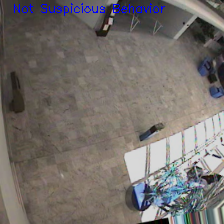

In [ ]:
font = cv2.FONT_HERSHEY_SIMPLEX
image = copy.copy(new_rest[150])
label = y_rest[150]
im_shape = image.shape
if label >= 0.5:
    image = cv2.rectangle(image, (1, 1), (im_shape[1]-1, im_shape[0]-1) , [255, 0, 0], 3)
    image = cv2.putText(img=image,text='Suspicious Behavior', org=(12,12), fontFace=font ,fontScale=0.4, color=[255,0,0], lineType=3)
else:
    image = cv2.putText(img=image,text='Not Suspicious Behavior', org=(12,12), fontFace=font ,fontScale=0.4, color=[255,0,0], lineType=3)
cv2_imshow(image)

In [ ]:
font = cv2.FONT_HERSHEY_SIMPLEX
label = y_pred[30]
image = x1[30]
im_shape = image.shape
if label >= 0.5:
    image = cv2.rectangle(image, (1, 1), (im_shape[1]-1, im_shape[0]-1) , [0, 0, 255], 3)
    image = cv2.putText(img=image,text='Suspicious Behavior', org=(12,12), fontFace=font ,fontScale=0.4, color=[0,0,255], lineType=3)
else:
    image = cv2.putText(img=image,text='Not Suspicious Behavior', org=(12,12), fontFace=font ,fontScale=0.4, color=[0,0,255], lineType=3)


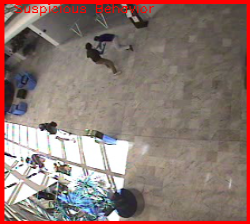

In [ ]:
image = cv2.resize(image, (250, 224))
cv2_imshow(image)

In [ ]:
label = y_pred[100]
image = X_test[100]
font = cv2.FONT_HERSHEY_SIMPLEX
im_shape = image.shape
if label >= 0.5:
    image = cv2.rectangle(image, (1, 1), (im_shape[1]-1, im_shape[0]-1) , [255, 0, 0], 3)
    image = cv2.putText(img=image,text='Suspicious Behavior', org=(12,12), fontFace=font ,fontScale=0.4, color=[255,0,0], lineType=3)
else:
    image = cv2.putText(img=image,text='Not Suspicious Behavior', org=(12,12), fontFace=font ,fontScale=0.4, color=[255,0,0], lineType=3)


In [ ]:
os.chdir('/content/drive/My Drive/data_caviar')
with open(r'X.npy', 'rb') as f:
  X = np.load(f, allow_pickle=True)
f.close()
with open(r'y.npy', 'rb') as f:
  y = np.load(f, allow_pickle=True)
f.close()

In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
os.environ['CUDA_VISIBLE_DEVICES'] = '0,2'
gpu_options = tf.GPUOptions(allow_growth=True)
session = tf.InteractiveSession(config=tf.ConfigProto(gpu_options=gpu_options))

In [6]:
################### WORK - Resnet50 TRANSFER MODEL
video = Input(shape=(40, 224, 224, 3))
cnn_base = ResNet50(input_shape=(224, 224, 3), weights="imagenet", include_top=False)
cnn_out = GlobalAveragePooling2D()(cnn_base.output)
cnn = Model(inputs=cnn_base.input, outputs=cnn_out)
cnn.trainable = False
x = TimeDistributed(cnn)(video)
x = GRU(512, return_sequences=True)(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.2)(x)
x = Dense(1, activation="sigmoid")(x)
model = Model([video], x)
model.summary()

earlystop = EarlyStopping(patience=7)
callbacks = [earlystop]

model.compile(optimizer='adam', loss='binary_crossentropy',metrics=["accuracy"], )
model.fit(X, y, batch_size=20, epochs=100, shuffle=False, callbacks=callbacks)
"""
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()"""

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 40, 224, 224, 3)] 0         
_________________________________________________________________
time_distributed (TimeDistri (None, 40, 2048)          23587712  
_________________________________________________________________
gru (GRU)                    (None, 40, 512)           3933696   
_________________________________________________________________
dropout (Dropout)            (None, 40, 512)           0         
_________________________________________________________________
dense (Dense)                (None, 40, 1024)          525312    
_________________________________________________________________
dropout_1 (Dropout)          (None, 40, 1024)          0         
_________________________________________________________________
dense_1 (Dense)              (None, 40, 1)            

'\nplt.plot(history.history[\'accuracy\'])\nplt.plot(history.history[\'val_accuracy\'])\nplt.title(\'model accuracy\')\nplt.ylabel(\'accuracy\')\nplt.xlabel(\'epoch\')\nplt.legend([\'train\', \'validation\'], loc=\'upper left\')\nplt.show()\n# "Loss"\nplt.plot(history.history[\'loss\'])\nplt.plot(history.history[\'val_loss\'])\nplt.title(\'model loss\')\nplt.ylabel(\'loss\')\nplt.xlabel(\'epoch\')\nplt.legend([\'train\', \'validation\'], loc=\'upper left\')\nplt.show()'

In [7]:
model.save('model4.h5', overwrite=True)

In [ ]:
############################################### NEW DATA IN GRAY CHANNEL
os.chdir('/content/drive/My Drive/data_caviar')
with open(r'label_Walk/X.npy', 'rb') as f:
  X_walk = np.load(f, allow_pickle=True)
f.close()
with open(r'label_Walk/y.npy', 'rb') as f:
  y_walk = np.load(f, allow_pickle=True)
f.close()

with open(r'label_Fight/X.npy', 'rb') as f:
  X_fight = np.load(f, allow_pickle=True)
f.close()
with open(r'label_Fight/y.npy', 'rb') as f:
  y_fight = np.load(f, allow_pickle=True)
f.close()

with open(r'label_LeftBag/X.npy', 'rb') as f:
  X_leftbag = np.load(f, allow_pickle=True)
f.close()
with open(r'label_LeftBag/y.npy', 'rb') as f:
  y_leftbag = np.load(f, allow_pickle=True)
f.close()

with open(r'label_Groups_Meeting/X.npy', 'rb') as f:
  X_groups = np.load(f, allow_pickle=True)
f.close()
with open(r'label_Groups_Meeting/y.npy', 'rb') as f:
  y_groups = np.load(f, allow_pickle=True)
f.close()

with open(r'label_Rest/X.npy', 'rb') as f:
  X_rest = np.load(f, allow_pickle=True)
f.close()
with open(r'label_Rest/y.npy', 'rb') as f:
  y_rest = np.load(f, allow_pickle=True)
f.close()

gen = ImageDataGenerator()
new_fight = []
for i in X_fight[:]:
  new_fight.append(gen.apply_transform(i, transform_parameters={'theta':10, 'brightness':0.85, 'flip_horizontal':True, 'shear_range':0.15,'zoom_range':0.15}))
new_fight = np.array(new_fight)

gen = ImageDataGenerator()
new_leftbag = []
for i in X_leftbag[:]:
  new_leftbag.append(gen.apply_transform(i, transform_parameters={'theta':10,'brightness':0.85,'flip_horizontal':True, 'shear_range':0.15,'zoom_range':0.15}))
new_leftbag = np.array(new_leftbag)

gen = ImageDataGenerator()
new_groups = []
for i in X_groups[:]:
  new_groups.append(gen.apply_transform(i, transform_parameters={'theta':10,'brightness':0.85, 'flip_horizontal':True, 'shear_range':0.15, 'zoom_range':0.15}))
new_groups = np.array(new_groups)

X = np.concatenate((X_walk[:-125], X_groups[:-125], new_groups[:-165], X_fight[:-125], new_fight[:-125], X_leftbag[:-125], new_leftbag[:-125], X_rest[:-125]),axis=0)
y = np.concatenate((y_walk[:-125], y_groups[:-125], y_groups[:-165], y_fight[:-125], y_fight[:-125], y_leftbag[:-125], y_leftbag[:-125], y_rest[:-125]),axis=0)

X = X[:,10:285,30:335]
X = np.array([cv2.resize(i, (224,224)) for i in X[:,:]])

#X = np.array([cv2.cvtColor(i, cv2.COLOR_BGR2GRAY) for i in X[:]])   # TO GREYSCALE
#X = X.reshape(30, 90, 224, 224, 1)       # TO GREYSCALE

X = np.array([i for idx,i in enumerate(X[:]) if idx %3 != 0])
y = np.array([i for idx,i in enumerate(y[:]) if idx %3 != 0])

#For 3 channels
#y[y == 2] = 1  

############## One channel Data

#onehot_encoder = OneHotEncoder(sparse=False)
#y = onehot_encoder.fit_transform(y)
#y = y.astype(np.int8)
#y = y.reshape(80, 40, 3)

X = X.reshape(120, 40 ,224, 224, 3)
y = y.reshape(120, 40, 1)


del X_fight, X_groups, X_leftbag, X_rest, X_walk, new_fight, new_leftbag, new_groups
del y_fight, y_groups, y_leftbag, y_rest, y_walk

In [10]:
X = np.concatenate((X_walk[-400:], X_groups[-200:], new_groups[-300:], X_fight[-200:], new_fight[-300:], X_leftbag[-500:], new_leftbag[-800:], X_rest[-249:]),axis=0)
y = np.concatenate((y_walk[-400:], y_groups[-200:], y_groups[-300:], y_fight[-200:], y_fight[-300:], y_leftbag[-500:], y_leftbag[-800:], y_rest[-249:]),axis=0)

X = X[:,10:285,30:335]
X = np.array([cv2.resize(i, (224,224)) for i in X[:,:]])

#X = np.array([cv2.cvtColor(i, cv2.COLOR_BGR2GRAY) for i in X[:]])   # TO GREYSCALE
#X = X.reshape(30, 90, 224, 224, 1)       # TO GREYSCALE

X = np.array([i for idx,i in enumerate(X[:]) if idx %3 != 0])
y = np.array([i for idx,i in enumerate(y[:]) if idx %3 != 0])

#For 1 classification
y[y == 2] = 1  


del X_fight, X_groups, X_leftbag, X_rest, X_walk, new_fight, new_leftbag, new_groups
del y_fight, y_groups, y_leftbag, y_rest, y_walk

In [17]:
X = X[6:]
y = y[6:]
X = X.reshape(49, 40, 224, 224, 3)
y = y.reshape(49, 40, 1)

In [19]:
model.evaluate(X, y, batch_size=16)

4/4 [==============================] - 15s 4s/step - loss: 0.9741 - accuracy: 0.6265


[0.9741226434707642, 0.6265305876731873]